# Heart Disease Dataset Analysis

This notebook analyzes the Heart Disease dataset from the UCI Machine Learning Repository. We'll perform data exploration, analysis, and visualization.

## Task 1: Load and Explore the Dataset

First, let's import the required libraries and load the dataset.

In [2]:
# Import required libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
plt.style.use('seaborn-v0_8')

Now, let's fetch the heart disease dataset and examine its structure.

In [3]:
# Fetch the heart disease dataset
heart_disease = fetch_ucirepo(id=45)

# Get features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine features and target into one dataframe
df = pd.concat([X, y], axis=1)

# Display dataset information
print("\nDataset Metadata:")
print(heart_disease.metadata)

print("\nVariable Information:")
print(heart_disease.variables)


Dataset Metadata:
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. János

Let's examine the first few rows of the dataset and check for missing values.

In [4]:
# Display first few rows
print("First few rows of the dataset:")
display(df.head())

# Check data types and missing values
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

First few rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0



Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


## Task 2: Data Cleaning and Basic Analysis

Let's clean the dataset by handling missing values and perform basic statistical analysis.

In [5]:
# Clean the dataset by filling missing values with median for numerical columns
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column] = df[column].fillna(df[column].median())

# Basic statistical summary
print("Basic Statistics:")
display(df.describe())

# Group by sex (1 = male; 0 = female) and compute mean age
print("\nAverage Age by Gender:")
display(df.groupby('sex')['age'].mean())

# Group by target (heart disease presence) and compute mean age
print("\nAverage Age by Heart Disease Status:")
display(df.groupby('num')['age'].mean())

Basic Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000



Average Age by Gender:


sex
0    55.721649
1    53.834951
Name: age, dtype: float64


Average Age by Heart Disease Status:


num
0    52.585366
1    55.381818
2    58.027778
3    56.000000
4    59.692308
Name: age, dtype: float64

## Task 3: Data Visualization

Let's create various visualizations to better understand the data.

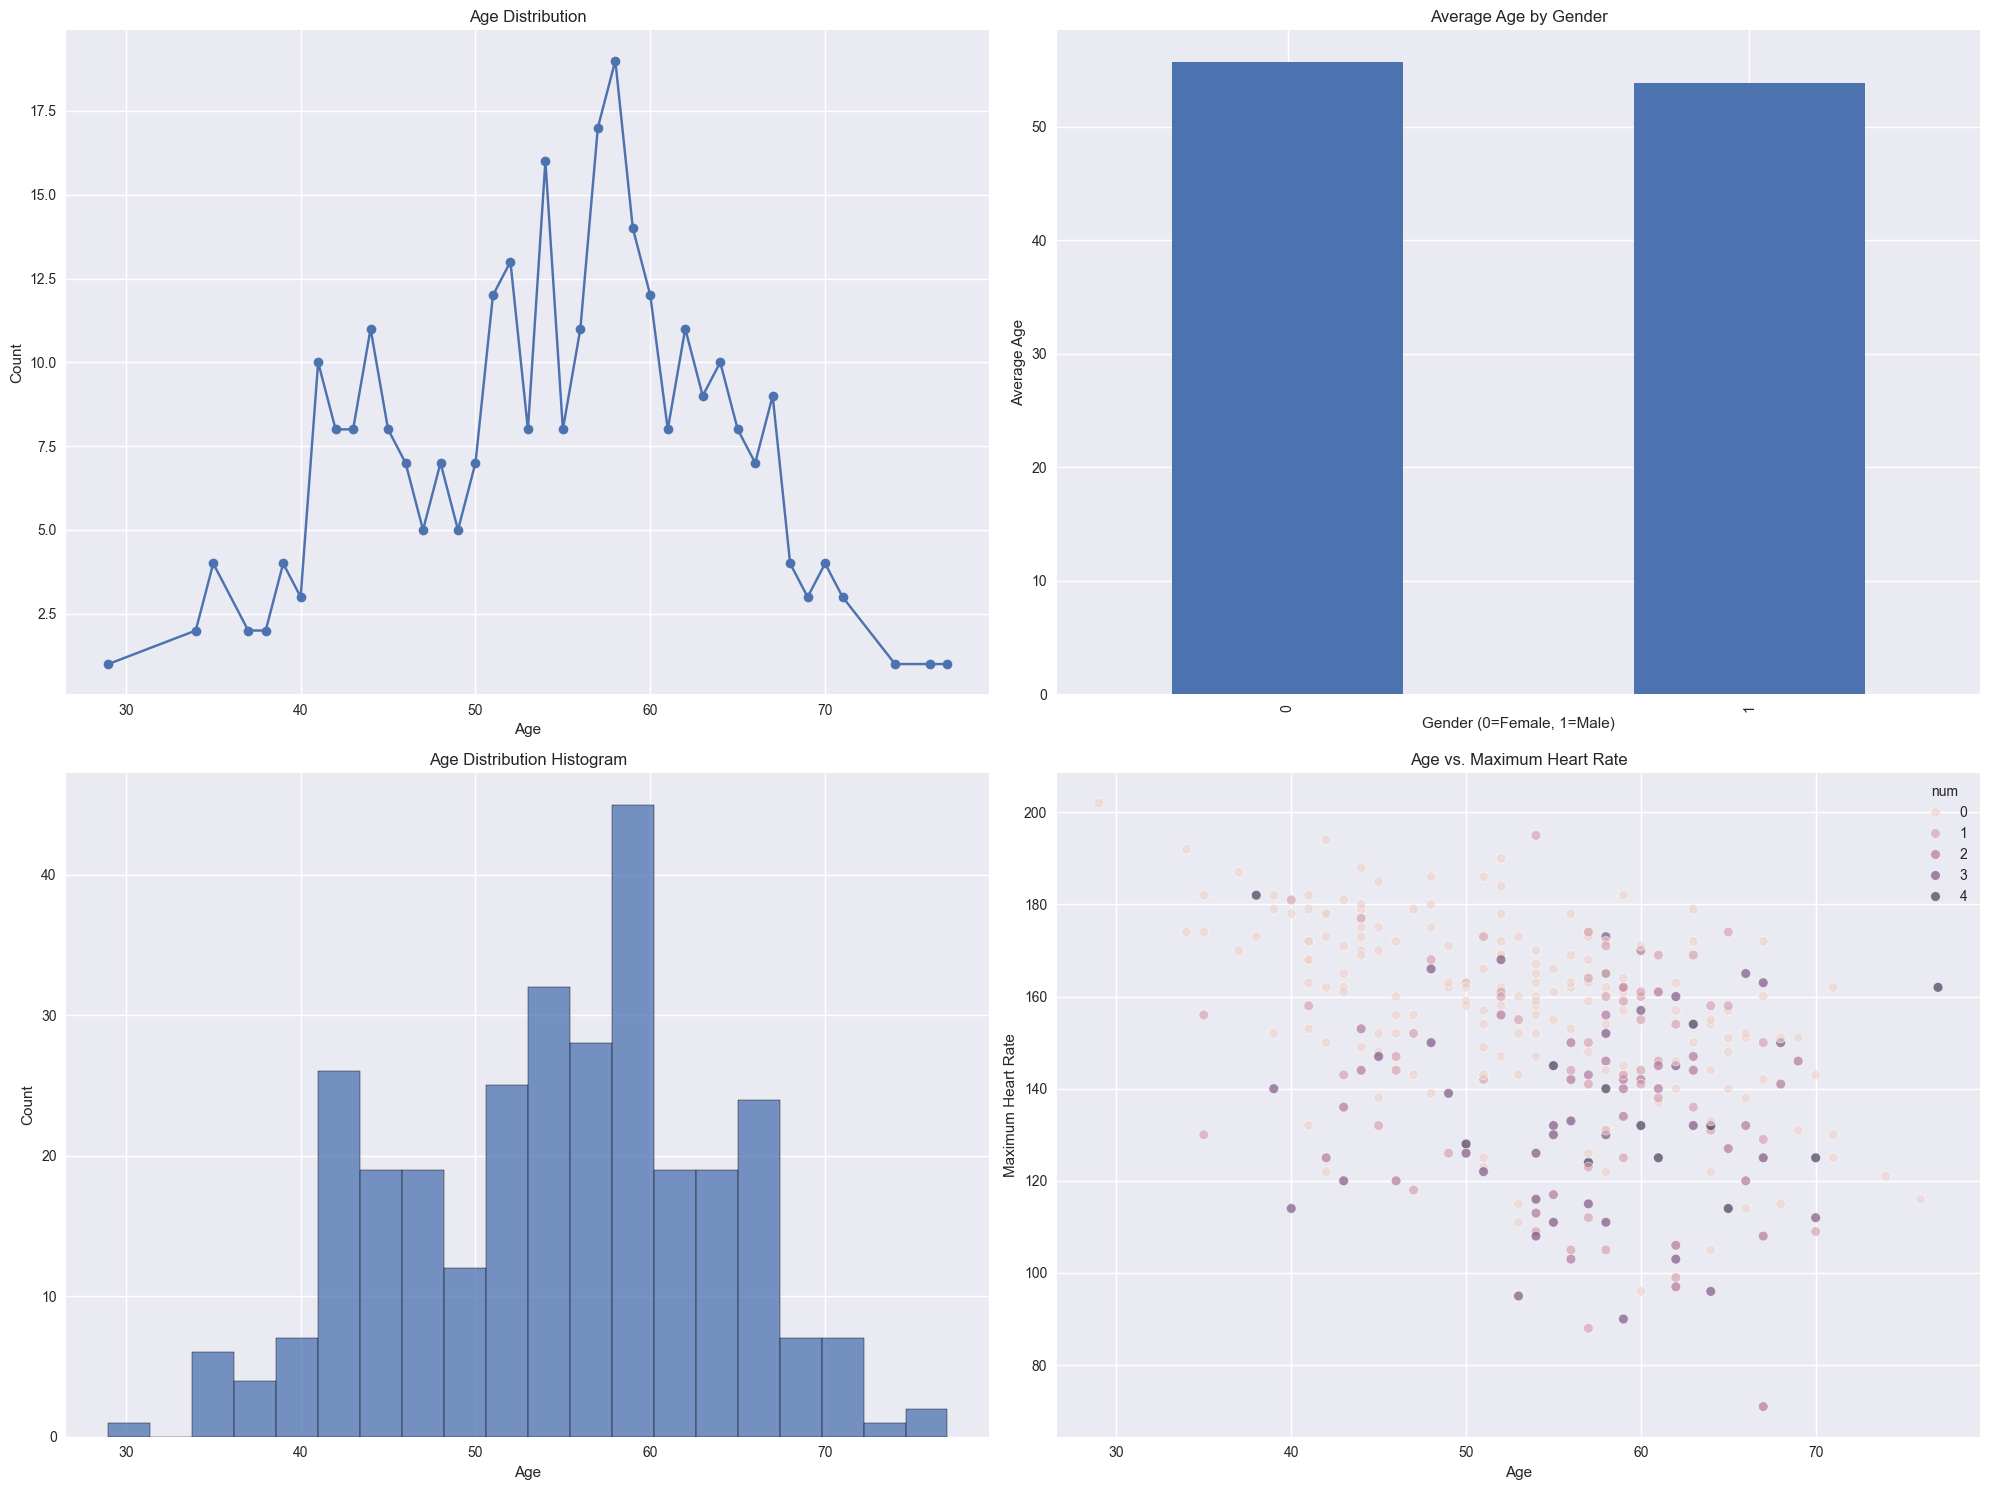

In [6]:
# Create a figure with subplots
plt.figure(figsize=(20, 15))

# 1. Line chart showing age distribution
plt.subplot(2, 2, 1)
age_counts = df['age'].value_counts().sort_index()
plt.plot(age_counts.index, age_counts.values, marker='o')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Bar chart showing average age by gender
plt.subplot(2, 2, 2)
gender_age = df.groupby('sex')['age'].mean()
gender_age.plot(kind='bar')
plt.title('Average Age by Gender')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Average Age')

# 3. Histogram of age distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='age', bins=20)
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

# 4. Scatter plot of age vs. maximum heart rate
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='age', y='thalach', hue='num', alpha=0.6)
plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

plt.tight_layout()
plt.show()

Let's also create a correlation heatmap to understand relationships between variables.

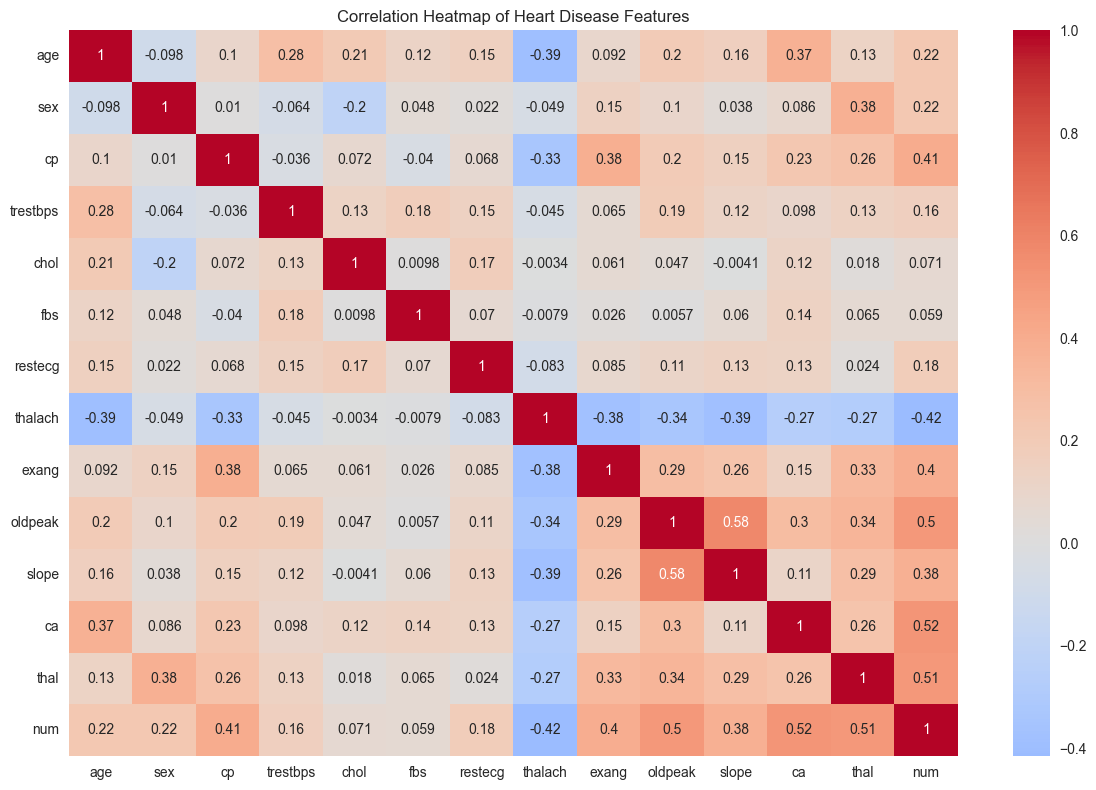

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Heart Disease Features')
plt.tight_layout()
plt.show()

## Summary of Findings

Let's summarize the key findings from our analysis:

In [8]:
# Print interesting findings
print("Interesting Findings:")
print("1. Gender Distribution:")
display(df['sex'].value_counts())

print("\n2. Heart Disease Distribution:")
display(df['num'].value_counts())

print("\n3. Average Age by Heart Disease Status:")
display(df.groupby('num')['age'].mean())

Interesting Findings:
1. Gender Distribution:


sex
1    206
0     97
Name: count, dtype: int64


2. Heart Disease Distribution:


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


3. Average Age by Heart Disease Status:


num
0    52.585366
1    55.381818
2    58.027778
3    56.000000
4    59.692308
Name: age, dtype: float64